In [1]:
import numpy as np
import keras
import cv2 as cv2
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from skimage.measure import regionprops
import matplotlib.patches as mpatches
from skimage.morphology import label
from skimage import *
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_path = 'Training'
test_path = 'Test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),classes=['Healthy_Leaves','Unhealthy_Leaves'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),classes=['Healthy_Leaves','Unhealthy_Leaves'], batch_size=10)

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# Prepoccessing the images

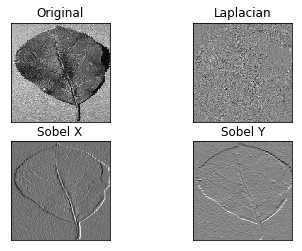

In [4]:
image_path = 'Training/Unhealthy_Leaves/d2313a95-61dd-45de-a8b8-3c2992e2b97f___JR_FrgE.S 8652.JPG'
nimg = cv2.imread(image_path,0)
edges = cv2.Canny(nimg,200,200)

laplacian = cv2.Laplacian(nimg,cv2.CV_64F)
sobelx = cv2.Sobel(nimg,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(nimg,cv2.CV_64F,0,1,ksize=5)  # y


plt.subplot(121),plt.imshow(nimg,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,1),plt.imshow(nimg,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

In [5]:
image_path = 'Training/Healthy_Leaves/wb1226-06-4.jpg'
img = cv2.imread(image_path, 1)#color
cv2.imshow('colored image', img)
cv2.waitKey()
nimg = cv2.imread(image_path, 0)#grayscale
nimg = cv2.threshold(nimg, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary
image, contours, hier = cv2.findContours(nimg, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
ret, labels = cv2.connectedComponents(nimg)

# Map component labels to hue val
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
# set bg label to black
labeled_img[label_hue==0] = 0

cv2.imshow('labeled.png', labeled_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
# label_image = label(labeled_img)
# blobs = measure.label(label_image, connectivity=1)
# props = measure.regionprops(blobs)
# props[0].bbox
#roi = regionprops(props)
#props[0].area
#cv2.imshow(roi)
w_max = 0
h_max = 0
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),2)
    #print(x,y,w,h)
    if (w_max*h_max) < (w*h) and x != 0 and y != 0:
        x_max = x
        y_max = y
        w_max = w
        h_max = h
#print(x_max,y_max,h_max,w_max)
cv2.rectangle(img, (x_max,y_max), (x_max+w_max, y_max+h_max), (0,255,0),2)
cv2.imshow('uncropped image', img)
cv2.waitKey()
img = img[y_max:y_max+h_max, x_max:x_max+w_max]
cv2.imshow('cropped image', img)
cv2.waitKey()
cv2.destroyAllWindows()

# Training the model

In [7]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    Flatten(),
    Dense(2,activation='softmax')
])

In [9]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit_generator(train_batches, steps_per_epoch=4,
                   validation_data=test_batches, validation_steps=4,epochs=10,verbose=2)

Epoch 1/10
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 7.6561 - val_acc: 0.5250
Epoch 2/10
 - 1s - loss: 8.4620 - acc: 0.4750 - val_loss: 7.6561 - val_acc: 0.5250
Epoch 3/10
 - 1s - loss: 7.2531 - acc: 0.5500 - val_loss: 7.6561 - val_acc: 0.5250
Epoch 4/10
 - 1s - loss: 8.8650 - acc: 0.4500 - val_loss: 7.6561 - val_acc: 0.5250
Epoch 5/10
 - 2s - loss: 7.6561 - acc: 0.5250 - val_loss: 7.6561 - val_acc: 0.5250
Epoch 6/10
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 7.6561 - val_acc: 0.5250
Epoch 7/10
 - 2s - loss: 8.4620 - acc: 0.4750 - val_loss: 7.6561 - val_acc: 0.5250
Epoch 8/10
 - 2s - loss: 7.2531 - acc: 0.5500 - val_loss: 7.6561 - val_acc: 0.5250
Epoch 9/10
 - 2s - loss: 7.6561 - acc: 0.5250 - val_loss: 7.6561 - val_acc: 0.5250
Epoch 10/10
 - 2s - loss: 8.8650 - acc: 0.4500 - val_loss: 7.6561 - val_acc: 0.5250


# Predict

In [13]:
predictions = model.predict_generator(test_batches,steps=1,verbose=0)

In [14]:
predictions

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]], dtype=float32)